In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Drop the columns "id" and "Unnamed: 0"

In [3]:
df=df.drop(['id','Unnamed: 0'],axis=1)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21600 non-null float64
bathrooms        21603 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(13), object(1)
memory usage: 3.3+ MB


In [5]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

#### We can replace the missing values of the columna 'bedrooms'and 'bathrooms' with the mode of the column  'bedrooms' and 'bathrooms'

In [19]:
mode=df['bedrooms'].mode()
mode


0    3.0
dtype: float64

In [20]:
df['bedrooms']=df['bedrooms'].fillna(value=3)
df['bedrooms'].isna().sum()

0

In [25]:
mode=df['bathrooms'].mode()
mode

0    2.5
dtype: float64

In [26]:
df['bathrooms']=df['bathrooms'].fillna(value=2.5)
df['bathrooms'].isna().sum()

0

In [27]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [28]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

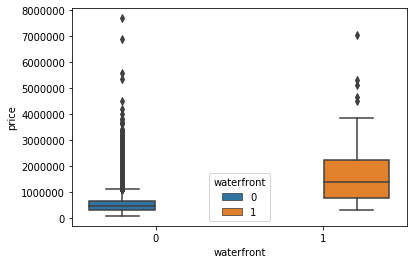

In [29]:
sns.boxplot('waterfront','price',data=df,hue='waterfront')

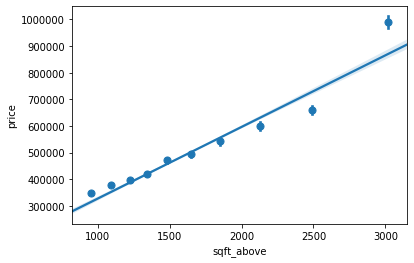

In [30]:
df.corr()
sns.regplot('sqft_above','price',x_bins=10,data=df)

#### The feature sqft_above is positively correlated with price

In [31]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525649
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

#### linear regression model to predict the 'price' using the feature 'sqft_living'

In [35]:
X = df[['sqft_living']]
Y = df['price']

In [36]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### R^2 Score 

In [54]:
lm.score(X, Y)

0.596137316150783

#### Predicted price for sqft_living

In [42]:
predict=lm.predict([[1180]])
predict

array([287555.06702452])

#### linear regression model to predict the 'price' using the list of features:

In [44]:
features =["floors", "waterfront","bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
df[features].head(5)

,floors,waterfront,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,1.0,0,3.0,0,0,1.00,1340,1180,7,1180
1,2.0,0,3.0,400,0,2.25,1690,2170,7,2570
2,1.0,0,2.0,0,0,1.00,2720,770,6,770
3,1.0,0,4.0,910,0,3.00,1360,1050,7,1960
4,1.0,0,3.0,0,0,2.00,1800,1680,8,1680


In [46]:
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### R^2 Score 

In [47]:
lm.score(X, Y)

0.596137316150783

#### Pipeline object to predict the 'price'

In [48]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [50]:
X = df[features]
y = df['price']
pipe = Pipeline(Input)
pipe.fit(X,y)
Pipeline(Input)
pipe.score(X,y)

0.6789206089548941